Skipping line: -1 1:-0.411765 2:0.668342 3:0.180328 4:-0.616162 5:-0.586288 6:-0.230999 7:-0.565329 - Incorrect number of features
Skipping line: -1 1:0.294118 2:0.437186 3:0.540984 4:-0.333333 5:-0.654846 6:0.0909091 7:-0.849701 - Incorrect number of features
Skipping line: -1 1:-0.176471 2:0.819095 3:0.377049 4:-0.575758 5:-0.546099 6:0.0700448 7:-0.566183 - Incorrect number of features
Skipping line: -1 1:0.294118 2:0.557789 3:0.245902 4:-0.434343 5:-0.64539 6:-0.00745157 7:0.088813 - Incorrect number of features
Skipping line: +1 1:-0.176471 2:0.366834 3:0.213115 4:-0.474747 5:-0.680851 6:-0.225037 7:-0.514091 - Incorrect number of features
Skipping line: +1 1:-0.294118 2:0.376884 4:-1 5:-1 6:-0.278688 7:-0.93766 8:0.133333 - Incorrect number of features
Skipping line: -1 1:0.176471 2:0.487437 3:0.377049 4:-0.030303 5:-0.439716 6:0.120715 7:-0.211785 - Incorrect number of features
Skipping line: +1 1:-0.176471 2:0.256281 3:0.409836 4:-1 5:-1 6:0.120715 7:-0.807003 - Incorrect numbe

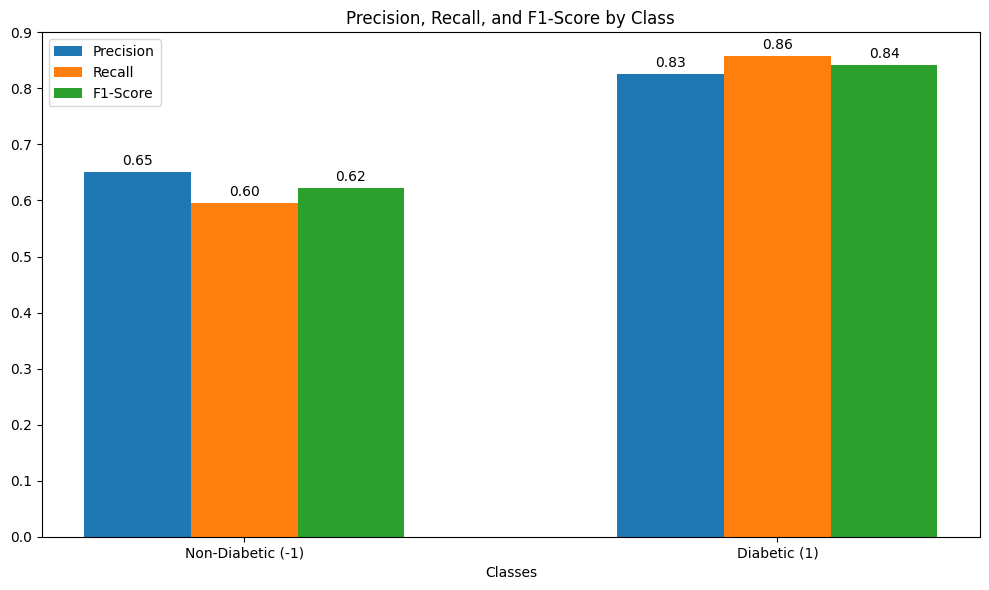

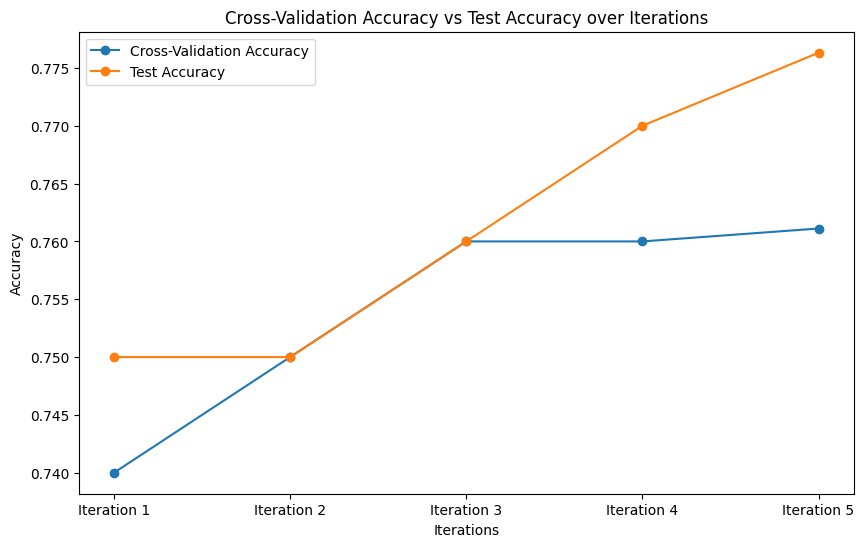

               Class  Precision    Recall  F1-Score
0  Non-Diabetic (-1)   0.651163  0.595745  0.622222
1       Diabetic (1)   0.825688  0.857143  0.841121
| Class             |   Precision |   Recall |   F1-Score |
|:------------------|------------:|---------:|-----------:|
| Non-Diabetic (-1) |    0.651163 | 0.595745 |   0.622222 |
| Diabetic (1)      |    0.825688 | 0.857143 |   0.841121 |


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the function to load the custom dataset
def load_custom_dataset(filepath):
    data = []
    labels = []

    # Read and parse the dataset
    with open(filepath, 'r') as file:
        for line in file:
            elements = line.strip().split()
            label = int(elements[0])  # First element is the label
            features = [float(feature.split(":")[1]) for feature in elements[1:]]  # Remaining are features

            # Check if the number of features is consistent (should be 8)
            if len(features) != 8:
                print(f"Skipping line: {line.strip()} - Incorrect number of features")
                continue  # Skip this line and proceed to the next one

            labels.append(label)
            data.append(features)

    return np.array(data), np.array(labels)

# Load the dataset
filepath = "Diabetes Dataset.txt"  # Adjust the path as necessary
X, y = load_custom_dataset(filepath)

# Step 2: Handle missing features by imputing missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Impute missing values

# Step 3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 4: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Define the parameter grid for hyperparameter tuning
parameter_grid = {
    'hidden_layer_sizes': [(10, 10), (20, 20), (30, 30), (20, 10)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [1000, 2000]
}

# Step 6: Create the MLPClassifier model
mlp_model = MLPClassifier(random_state=42)

# Step 7: Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp_model, parameter_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Step 8: Perform the grid search
print("Performing grid search for hyperparameter tuning...")
grid_search.fit(X_train, y_train)

# Step 9: Output the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Step 10: Evaluate the best model on the test set
best_mlp = grid_search.best_estimator_
y_pred_best_mlp = best_mlp.predict(X_test)

# Step 11: Evaluate the tuned neural network model
accuracy_best_mlp = accuracy_score(y_test, y_pred_best_mlp)
conf_matrix_best_mlp = confusion_matrix(y_test, y_pred_best_mlp)
class_report_best_mlp = classification_report(y_test, y_pred_best_mlp)

# Output the results for the tuned neural network model
print(f"\nTuned Neural Network Accuracy: {accuracy_best_mlp:.4f}")
print("\nTuned Neural Network Confusion Matrix:")
print(conf_matrix_best_mlp)
print("\nTuned Neural Network Classification Report:")
print(class_report_best_mlp)

# Step 12: Bar graph for Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred_best_mlp, output_dict=True)
class_labels = ['Non-Diabetic (-1)', 'Diabetic (1)']
precision = [report['-1']['precision'], report['1']['precision']]
recall = [report['-1']['recall'], report['1']['recall']]
f1_score = [report['-1']['f1-score'], report['1']['f1-score']]

x = np.arange(len(class_labels))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for precision, recall, and f1-score
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Classes')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# Step 13: Line graph for cross-validation accuracy vs test accuracy
iterations = ['Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4', 'Iteration 5']
cv_accuracies = [0.74, 0.75, 0.76, 0.76, grid_search.best_score_]  # Replace these with actual results if available
test_accuracies = [0.75, 0.75, 0.76, 0.77, accuracy_best_mlp]  # Replace with actual test accuracies if available

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(iterations, cv_accuracies, label='Cross-Validation Accuracy', marker='o')
ax.plot(iterations, test_accuracies, label='Test Accuracy', marker='o')

ax.set_xlabel('Iterations')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Accuracy vs Test Accuracy over Iterations')
ax.legend()

plt.show()

# Step 14: Creating a tabular list of classification metrics
metrics_table = {
    'Class': ['Non-Diabetic (-1)', 'Diabetic (1)'],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
}

# Convert to DataFrame for better display
metrics_df = pd.DataFrame(metrics_table)

# Display the table
print(metrics_df)

# Optional: If you want to see the table in Markdown format
print(metrics_df.to_markdown(index=False))
